In [ ]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import os

from functions_D3D import fetch_and_save_alplakes_data_map, fetch_and_save_alplakes_point_data, plot_alplakes_temperature_velocity, generate_output_path, plot_temperature_timeseries


to do

make the code easily changeable to other lakes, days, depth etc

plot temperature time series at different x,y,z
plot temperature heatmap at x,y
plot transect

convert json to csv

Output file: ../data/Joux/joux_202304050300__1m_delft3d-flow.json
Fetching data from API...
✓ Data fetched successfully!
  Response length: 117463 characters
✓ Data saved to: ../data/Joux/joux_202304050300__1m_delft3d-flow.json

Data summary:
  Time: 2023-04-05T03:00:16+00:00
  Depth: 1.1448124647140503 m
  Variables: ['temperature', 'u', 'v']
✓ Data loaded successfully!
  Time: 2023-04-05T03:00:16+00:00
  Depth: 1.14 m
  Grid shape: (153, 22)
  Temperature range: 5.11°C to 5.79°C
  Valid data points: 2149 out of 3366
  Velocity arrows: 987 displayed


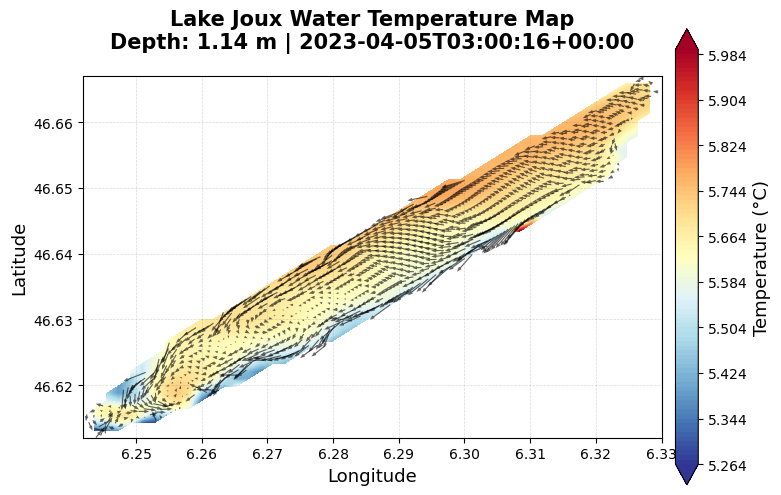

In [2]:

# Usage example
api_url = "https://alplakes-api.eawag.ch/simulations/layer/delft3d-flow/joux/202304050300/1?variables=temperature&variables=velocity"
data = fetch_and_save_alplakes_data_map(api_url)
fig, ax = plot_alplakes_temperature_velocity(data, grid_size=50, skip=2, figsize=(8, 6))
plt.show()

In [3]:
# Usage example
data = fetch_and_save_alplakes_point_data(
     lake='geneva',
     start_time='202304050300',
     end_time='202304112300',
     depth=1,
     lat=46.5,
     lon=6.67,
     variables=['temperature', 'velocity']
 )

API URL: https://alplakes-api.eawag.ch/simulations/point/delft3d-flow/geneva/202304050300/202304112300/1/46.5/6.67?variables=temperature&variables=velocity
Output file: ../data/Geneva/geneva_point_202304050300_202304112300_1m.json
Fetching data from API...
✓ Data fetched successfully!
  Response length: 3312 characters
✓ Data saved to: ../data/Geneva/geneva_point_202304050300_202304112300_1m.json

Data summary:
  Time steps: 55
  Location: (46.50151142593926, 6.668142070897482)
  Depth: 0.9559634923934937 m
  Distance from requested point: 220.15427109624414 m
  Variables: ['temperature', 'u', 'v']
  Time range: 2023-04-05T03:00:16+00:00 to 2023-04-11T20:59:44+00:00


In [4]:
data

{'time': ['2023-04-05T03:00:16+00:00',
  '2023-04-05T06:00:00+00:00',
  '2023-04-05T08:59:44+00:00',
  '2023-04-05T12:00:00+00:00',
  '2023-04-05T15:00:16+00:00',
  '2023-04-05T18:00:00+00:00',
  '2023-04-05T20:59:44+00:00',
  '2023-04-06T00:00:00+00:00',
  '2023-04-06T03:00:16+00:00',
  '2023-04-06T06:00:00+00:00',
  '2023-04-06T08:59:44+00:00',
  '2023-04-06T12:00:00+00:00',
  '2023-04-06T15:00:16+00:00',
  '2023-04-06T18:00:00+00:00',
  '2023-04-06T20:59:44+00:00',
  '2023-04-07T00:00:00+00:00',
  '2023-04-07T03:00:16+00:00',
  '2023-04-07T06:00:00+00:00',
  '2023-04-07T08:59:44+00:00',
  '2023-04-07T12:00:00+00:00',
  '2023-04-07T15:00:16+00:00',
  '2023-04-07T18:00:00+00:00',
  '2023-04-07T20:59:44+00:00',
  '2023-04-08T00:00:00+00:00',
  '2023-04-08T03:00:16+00:00',
  '2023-04-08T06:00:00+00:00',
  '2023-04-08T08:59:44+00:00',
  '2023-04-08T12:00:00+00:00',
  '2023-04-08T15:00:16+00:00',
  '2023-04-08T18:00:00+00:00',
  '2023-04-08T20:59:44+00:00',
  '2023-04-09T00:00:00+00:00',


In [ ]:
def plot_temperature_timeseries(data, figsize=(14, 6)):
    """Simple temperature time series plot."""
    import pandas as pd
    
    times = pd.to_datetime(data['time'])
    temperatures = data['variables']['temperature']['data']
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(times, temperatures, linewidth=2)
    
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Temperature (°C)', fontsize=12)
    ax.set_title(f'Water Temperature Time Series (Depth: {data["depth"]["data"]:.2f} m)', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    return fig, ax

(<Figure size 1400x600 with 1 Axes>,
 <Axes: title={'center': 'Water Temperature Time Series (Depth: 0.96 m)'}, xlabel='Date', ylabel='Temperature (°C)'>)

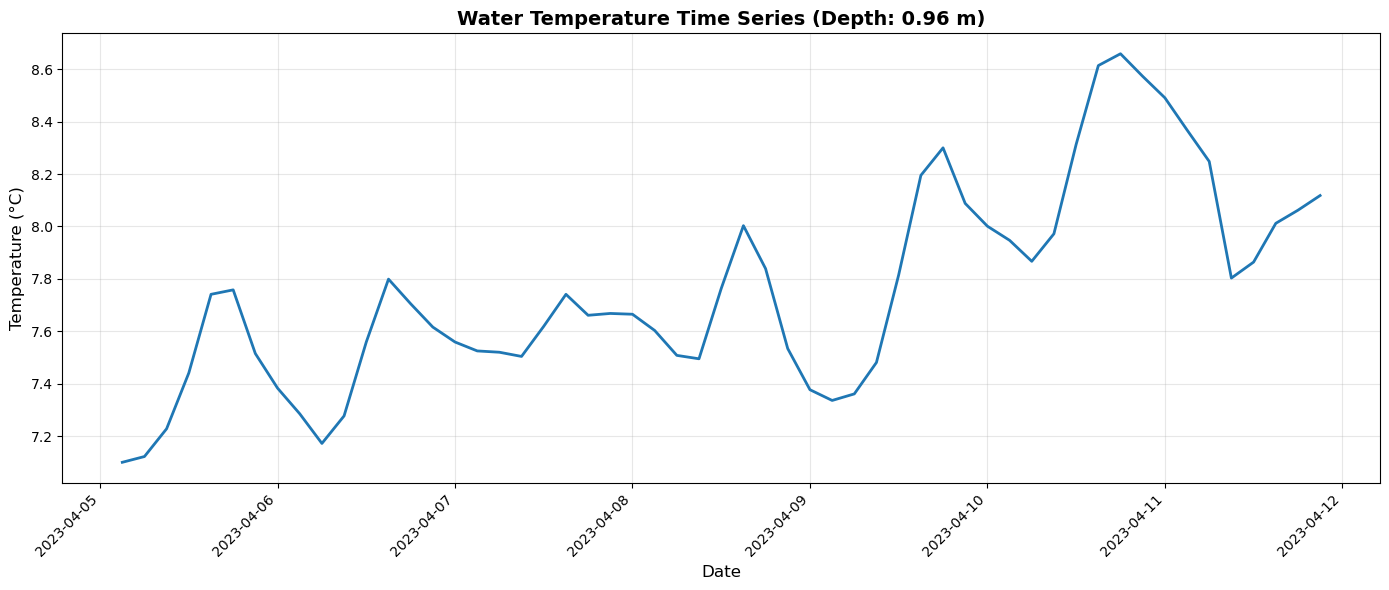

In [ ]:
plot_temperature_timeseries(data, figsize=(14, 6))